# Stock RSI
Developed by J.Welles Wilder in 1978, the RSI is an oscillator which is used to track the momentum of the stock price. Unlike other relative strength measures, the RSI compares the price of the stock relative to the actual stock, not against other stocks or indices. The basic premise of the RSI is that an advancing stock will trend close the high of the day, while a declining stock will trend toward the low.

## Import packages

In [44]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import requests

In [36]:
url = 'https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol=ADA&market=USD&interval=5min&apikey='
r = requests.get(url)
data = r.json()

In [37]:
candles_json = data["Time Series Crypto (5min)"]

In [50]:
transformed_data = {}
time_series = []
open_prices = []
high_prices = []
low_prices = []
close_prices = []
volumes = []
for key in candles_json:
    # utc_time = datetime.strptime(key, "%Y-%m-%d %H:%M:%S")
    # epoch_time = (utc_time - datetime(1970, 1, 1)).total_seconds()
    time_series.append(key)
    open_prices.append(float(candles_json[key]["1. open"]))
    high_prices.append(float(candles_json[key]["2. high"]))
    low_prices.append(float(candles_json[key]["3. low"]))
    close_prices.append(float(candles_json[key]["4. close"]))
    volumes.append(float(candles_json[key]["5. volume"]))

transformed_data = {
    "open": open_prices,
    "high": high_prices,
    "low": low_prices,
    "close": close_prices,
    "volume": volumes
}

In [63]:
# pandas data frame for plotting
prices = pd.DataFrame(transformed_data, index=time_series)
# seperate up and down candles
up = prices[prices.close >= prices.open]
down = prices[prices.close < prices.open]
up

,open,high,low,close,volume
2022-02-04 14:00:00,1.050,1.050,1.046,1.050,753804.0
2022-02-04 13:45:00,1.050,1.053,1.048,1.053,1013418.0
2022-02-04 13:35:00,1.049,1.052,1.048,1.051,1002089.0
2022-02-04 13:25:00,1.060,1.063,1.059,1.062,598333.0
2022-02-04 13:10:00,1.064,1.067,1.062,1.065,486454.0
2022-02-04 13:05:00,1.063,1.064,1.062,1.064,503412.0
2022-02-04 12:55:00,1.061,1.063,1.060,1.063,350049.0
2022-02-04 12:40:00,1.062,1.064,1.062,1.062,197877.0
2022-02-04 12:35:00,1.062,1.064,1.061,1.062,185665.0
2022-02-04 12:25:00,1.062,1.064,1.061,1.063,219734.0


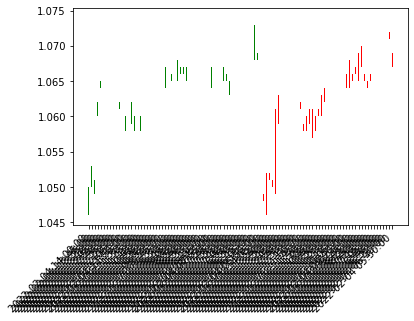

In [61]:
plt.figure()

width = .2
width2 = .02

up_color = "green"
down_color = "red"

# create up candles
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=up_color)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=up_color)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=up_color)

# create down candles
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=down_color)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=down_color)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=down_color)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

plt.show()

                  0      1      2      3        4
1.643984e+09  1.049  1.051  1.048  1.048   291637
1.643983e+09  1.050  1.050  1.046  1.050   753804
1.643983e+09  1.051  1.052  1.046  1.050   779761
1.643983e+09  1.052  1.054  1.050  1.051   404482
1.643982e+09  1.050  1.053  1.048  1.053  1013418
...             ...    ...    ...    ...      ...
1.643955e+09  1.072  1.073  1.069  1.071   309557
1.643955e+09  1.068  1.074  1.068  1.073  1307085
1.643954e+09  1.068  1.070  1.067  1.069   462042
1.643954e+09  1.068  1.070  1.067  1.068   180496
1.643954e+09  1.069  1.070  1.067  1.067   231208

[100 rows x 5 columns]
